<a href="https://colab.research.google.com/github/alperengulunay/Music-Genre-Classification/blob/main/pre-learned%20models%20experiments/test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [ ]:
import tensorflow
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow
import numpy as np

In [ ]:
train_dir = r'/content/drive/My Drive/Tüm Veriler/6000 mel_spec 44100 changed pop/train'
validation_dir = r'/content/drive/My Drive/Tüm Veriler/6000 mel_spec 44100 changed pop/validation'
test_dir = r'/content/drive/My Drive/Tüm Veriler/6000 mel_spec 44100 changed pop/test'

In [ ]:
test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
        )
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(299, 299),
        batch_size=10,
        class_mode='categorical',
        shuffle=False
        )

test_y=test_generator.classes

Found 500 images belonging to 10 classes.


In [ ]:
model_path = r'/content/drive/MyDrive/Tüm Veriler/inception_resnet_v2_8420_8820.h5'
model = tensorflow.keras.models.load_model(model_path)

In [ ]:
Ypred = model.predict(test_generator)
Ypred = np.argmax(Ypred, axis=1)

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

50/50 [==============================] - 9s 123ms/step - loss: 0.6348 - acc: 0.8820


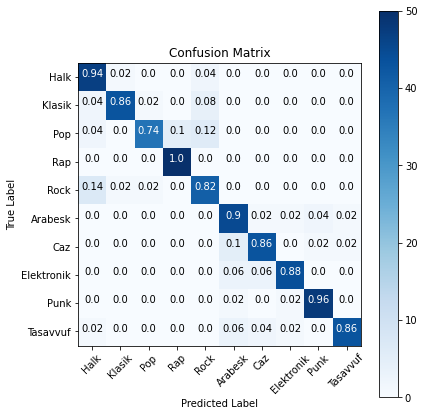

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,title='Confusion Matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j]/50,
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
plot_confusion_matrix(confusion_matrix(test_y,Ypred), classes=['Halk','Klasik','Pop','Rap','Rock','Arabesk','Caz','Elektronik','Punk','Tasavvuf'])

In [ ]:
print(test_generator.class_indices)
print(classification_report(test_y,Ypred))

{'Halk': 0, 'Klasik': 1, 'Pop': 2, 'Rap': 3, 'Rock': 4, 'arabesk': 5, 'caz': 6, 'elektronik': 7, 'punk': 8, 'tasavvuf': 9}
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        50
           1       0.96      0.86      0.91        50
           2       0.95      0.74      0.83        50
           3       0.91      1.00      0.95        50
           4       0.77      0.82      0.80        50
           5       0.79      0.90      0.84        50
           6       0.88      0.86      0.87        50
           7       0.94      0.88      0.91        50
           8       0.94      0.96      0.95        50
           9       0.96      0.86      0.91        50

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500

